In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\amani\OneDrive\Desktop\KKEM-ICT-DSA\car_age_price.csv')

In [8]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


<AxesSubplot:>

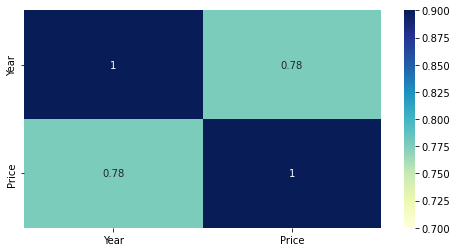

In [19]:
corrmatrix = data.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix, vmin = .7, vmax =.9, annot=True, cmap='YlGnBu')

In [20]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [22]:
y = data['Price']
X = data.drop(['Price'],axis =1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [25]:
from sklearn.linear_model import LinearRegression

In [27]:
lin_reg = LinearRegression()
model1 = lin_reg.fit(X_train,y_train)
predictions = model1.predict(X_test)

In [28]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [29]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
print('The mean squared error value is: ', mean_squared_error(y_test, predictions))
print('The r squared value is: ', r2_score(y_test, predictions))

The mean squared error value is:  4326906256.829671
The r squared value is:  0.36759313425902185


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)
lin_reg = LinearRegression()
model2 = lin_reg.fit(X_train,y_train)
predictions = model2.predict(X_test)
print('The mean squared error value is: ', mean_squared_error(y_test, predictions))
print('The r squared value is: ', r2_score(y_test, predictions))

The mean squared error value is:  3878767151.073449
The r squared value is:  0.4347961632108023


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
lin_reg = LinearRegression()
model3 = lin_reg.fit(X_train,y_train)
predictions = model3.predict(X_test)
print('The mean squared error value is: ', mean_squared_error(y_test, predictions))
print('The r squared value is: ', r2_score(y_test, predictions))

The mean squared error value is:  3783310947.894962
The r squared value is:  0.6535171622702558


In [41]:
data = pd.read_csv(r'C:\Users\amani\OneDrive\Desktop\KKEM-ICT-DSA\car_age_price.csv')

In [42]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [48]:
from sklearn.linear_model import Lasso

In [52]:
# define model
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [53]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 57.13
R squared test set 65.35


In [54]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 3163464417.31
MSE test set 3783332120.44


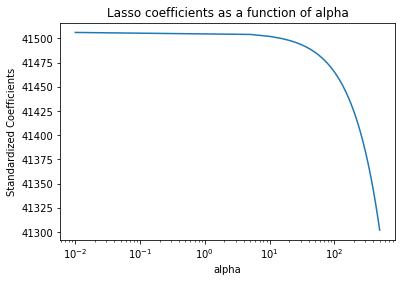

In [55]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [56]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [57]:
model.alpha_

2188.0887006277167

In [58]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=2188.0887006277167)

In [59]:
print(list(zip(lasso_best.coef_, X)))

[(40611.97974421256, 'Year')]


In [60]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 57.1
R squared test set 64.9


In [61]:
mean_squared_error(y_test, lasso_best.predict(X_test))

3832350548.023312

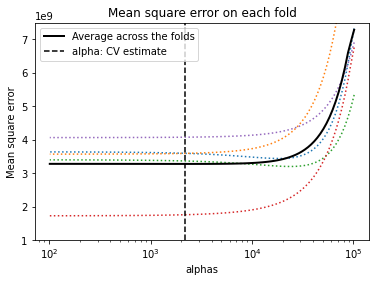

In [74]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 1000000000, 7500000000
plt.ylim(ymin, ymax);